# Features Selection for GDP growth

Data Processing

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [8]:
#importing data

country_Code = pd.read_excel('Ecodataset.xlsx', sheet_name="Country Code")
export_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Exports")
import_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Imports")
merchandise = pd.read_excel('Ecodataset.xlsx', sheet_name="Merchandise_traded")
agriculture_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Agriculture")
manufacture_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Manufacturing")
industry_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Industry")
gross_cap_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Gross capital formation")
revenue = pd.read_excel('Ecodataset.xlsx', sheet_name="Revenue excluding grants")
investment = pd.read_excel('Ecodataset.xlsx', sheet_name="Foreign direct investment")
expenses = pd.read_excel('Ecodataset.xlsx', sheet_name="Expenses")
savings = pd.read_excel('Ecodataset.xlsx', sheet_name="Savings")
debt = pd.read_excel('Ecodataset.xlsx', sheet_name="Govt_debt")
stocks = pd.read_excel('Ecodataset.xlsx', sheet_name="Stocks traded")
gdp_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="GDP_growth")

In [ ]:
year = []
myDATA = [export_Data, 
          import_Data,
          merchandise,
          agriculture_Data, 
          manufacture_Data, 
          industry_Data,
          gross_cap_Data,
          revenue,
          investment,
          expenses,
          savings,
          debt,
          stocks,
          gdp_Data]
year.extend(range(1960, 2020))
#year = [str(y)+"-04-01" for y in year]

for i in range(len(country_Code)):
    print(country_Code.iloc[i, 0] + " : " + country_Code.iloc[i, 1])

c_code = input("\nEnter country code: ").upper()
country = ""

mydict = {}                                #dictionary for each column 
count=0
for data in myDATA:
    col=[]
    for i in range(len(data)):
        if(data.iloc[i, 1] == c_code):
            country = data.iloc[i, 0]
            for j in range(4, len(data.columns)):
                col.append("%.2f"%data.iloc[i, j])
            mydict.update({"x"+str(count):col})
            count=count+1
            break
mydict.update({"Year" : year})
new_Data = pd.DataFrame(mydict)
#new_Data['Year'] = pd.to_datetime(new_Data['Year'])

#renaming the columns
new_Data.rename(columns={'x0':'Exports', 
                         'x1':'Imports', 
                         'x2':'Merchandise Traded',
                         'x3':'Agriculture', 
                         'x4':'Manufacturing', 
                         'x5':'Industry',
                         'x6':'Gross Capital',
                         'x7':'Revenues',
                         'x8':'Foreign Investment',
                         'x9':'Expenses',
                         'x10':'Savings',
                         'x11':'Government Debt',
                         'x12':'Stocks traded',
                         'x13':'GDP_growth'}, inplace=True)

new_Data = new_Data.set_index(['Year'])

Aruba : ABW
Afghanistan : AFG
Angola : AGO
Albania : ALB
Andorra : AND
Arab World : ARB
United Arab Emirates : ARE
Argentina : ARG
Armenia : ARM
American Samoa : ASM
Antigua and Barbuda : ATG
Australia : AUS
Austria : AUT
Azerbaijan : AZE
Burundi : BDI
Belgium : BEL
Benin : BEN
Burkina Faso : BFA
Bangladesh : BGD
Bulgaria : BGR
Bahrain : BHR
Bahamas, The : BHS
Bosnia and Herzegovina : BIH
Belarus : BLR
Belize : BLZ
Bermuda : BMU
Bolivia : BOL
Brazil : BRA
Barbados : BRB
Brunei Darussalam : BRN
Bhutan : BTN
Botswana : BWA
Central African Republic : CAF
Canada : CAN
Central Europe and the Baltics : CEB
Switzerland : CHE
Channel Islands : CHI
Chile : CHL
China : CHN
Cote d'Ivoire : CIV
Cameroon : CMR
Congo, Dem. Rep. : COD
Congo, Rep. : COG
Colombia : COL
Comoros : COM
Cabo Verde : CPV
Costa Rica : CRI
Caribbean small states : CSS
Cuba : CUB
Curacao : CUW
Cayman Islands : CYM
Cyprus : CYP
Czech Republic : CZE
Germany : DEU
Djibouti : DJI
Dominica : DMA
Denmark : DNK
Dominican Republic : D

In [ ]:
# Handling the missing values ('nan', '0.00') using mean

meanList = []
for cols in list(new_Data.columns.values):   #iterating over all the columns in 'new_Data'
    s = 0
    count = 0
    colVal = new_Data.loc[:, cols]
    for i in list(colVal):
        if( i not in ['nan', '0.00'] ):      #restrict the operation for the value 'nan' and '0.00'
            s = s + float(i)
            count = count + 1
    if(count == 0):
        meanList.append('0')
    else:
        meanList.append("%.2f"%(s/count))

#pop the last element of meanList which consists of Year
#meanList.pop()     
        
meanList = [float(i) for i in meanList]
columns = list(new_Data.columns)
print("Mean values for the respective columns are:\n")

for i in range(len(columns)):
    print(columns[i] + " : \t" + str(meanList[i]))

In [ ]:
col_no = 0
for m in meanList:
    for i in range(len(new_Data)):
        if(new_Data.iloc[i, col_no] in ['nan', '0.00'] ):     #replacing the values 'nan' and '0.00' with the mean value
            new_Data.iloc[i, col_no] = float(m)
        else:
            new_Data.iloc[i, col_no] = float(new_Data.iloc[i, col_no]) #converting every single value of the cell to float value
    col_no = col_no + 1

#Converting objects of the dataframe to float type
for col in columns:
    new_Data[col] = pd.to_numeric(new_Data[col])
print("Dataset for " + country + ":")
new_Data

# Variables Visualizations

In [ ]:
def Visualise(data, col):
    v = plt.plot(data, color = 'blue', label=col)
    plt.legend(loc = 'best')
    plt.title(col + ' visualization')
    plt.show(block=False)

for col in columns:
    Visualise(new_Data[col], col)

# Visualizing the models

In [ ]:
dLen = len(new_Data)
n = float(input("Enter % of train sample: "))
sample = int(dLen * n)
trainSet = new_Data.head(sample)
testSet = new_Data.tail(dLen - sample)

In [ ]:
'''PREPARING TEST AND TRAIN SAMPLE'''

Xtrain = []
Xtest = []
for i in range(len(trainSet)):
    Xtrain.append([])
    Xtrain[i].append(trainSet.iloc[i, 0])
    Xtrain[i].append(trainSet.iloc[i, 1])
    Xtrain[i].append(trainSet.iloc[i, 2])
    Xtrain[i].append(trainSet.iloc[i, 3])
    Xtrain[i].append(trainSet.iloc[i, 4])
    Xtrain[i].append(trainSet.iloc[i, 5])
    Xtrain[i].append(trainSet.iloc[i, 6])
    Xtrain[i].append(trainSet.iloc[i, 7])
    Xtrain[i].append(trainSet.iloc[i, 8])
    Xtrain[i].append(trainSet.iloc[i, 9])
    Xtrain[i].append(trainSet.iloc[i, 10])
    Xtrain[i].append(trainSet.iloc[i, 11])
    Xtrain[i].append(trainSet.iloc[i, 12])
for i in range(len(testSet)):
    Xtest.append([])
    Xtest[i].append(testSet.iloc[i, 0])
    Xtest[i].append(testSet.iloc[i, 1])
    Xtest[i].append(testSet.iloc[i, 2])
    Xtest[i].append(testSet.iloc[i, 3])
    Xtest[i].append(testSet.iloc[i, 4])
    Xtest[i].append(testSet.iloc[i, 5])
    Xtest[i].append(testSet.iloc[i, 6])
    Xtest[i].append(testSet.iloc[i, 7])
    Xtest[i].append(testSet.iloc[i, 8])
    Xtest[i].append(testSet.iloc[i, 9])
    Xtest[i].append(testSet.iloc[i, 10])
    Xtest[i].append(testSet.iloc[i, 11])
    Xtest[i].append(testSet.iloc[i, 12])

Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
Ytrain = np.array(trainSet['GDP_growth'])
Ytest = np.array(testSet['GDP_growth'])

In [ ]:
def VisualizeData(actualVal, predVal, model):
    org = plt.plot(actualVal, color = 'blue', label='Actual value')
    pred = plt.plot(predVal, color = 'red', label='Predicted value')
    plt.legend(loc = 'best')
    plt.title(model + " visualisation")
    plt.show(block=False)

def GetPred(Xtrain, Ytrain, Xtest, Ytest, modelList):
    from sklearn.metrics import mean_squared_error
    #for model in modelList:        
    m = modelList[0].lower()
    x = modelList[1]
    y = modelList[2]
    if(m in ['rf', 'random forest']):
        warnings.filterwarnings('ignore')
        from sklearn.ensemble import RandomForestRegressor
        ModelFit = RandomForestRegressor(n_estimators=100, max_features=x, random_state=y).fit(Xtrain, Ytrain)
    else:
        print('Model not present in the library.')
        
    pred = ModelFit.predict(Xtest)
    #Printing accuracy and RMSE
    print('\nR-square : %.4f'%r2_score(Ytest, pred))
    print('\nRMSE : %.4f'% np.sqrt(sum((np.array(pred) - np.array(Ytest))**2)/len(Ytest)))
    VisualizeData(Ytest, pred, m)

In [ ]:
GetPred(Xtrain, Ytrain, Xtest, Ytest, ['rf', 6, 22])

# Univariate Selection

In [ ]:
data = new_Data

In [ ]:
#Normalization

from sklearn import preprocessing as p
#from sklearn.preprocessing import StandardScaler
data = pd.DataFrame(p.MinMaxScaler(feature_range=(0,1)).fit_transform(data))
#data = pd.DataFrame(StandardScaler().fit_transform(data))

data.columns = columns      #renaming the columns

#renaming the rows
i = 0
for y in year:
    data.rename(index={i:y}, inplace=True)
    i = i+1
    
#showing dataset
data

In [ ]:
def Visualise(data, col):
    v = plt.plot(data, color = 'blue', label=col)
    plt.legend(loc = 'best')
    plt.title(col + ' visualization')
    plt.show(block=False)

for col in columns:
    Visualise(data[col], col)

In [ ]:
#Generating best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

X = data.iloc[:,0:12]
Y = data.iloc[:,-1]
best_features = SelectKBest(score_func=mutual_info_regression).fit(X, Y)
scores = pd.DataFrame(best_features.scores_)
features = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([features, scores], axis=1)
featureScores.columns = ['Features', 'Score']

plt.bar(featureScores['Features'], featureScores['Score'])
plt.xticks(rotation=90)
plt.title('Score Visualization')

#selecting important features according to the visualization
featuresList = []
for i in range(len(featureScores)):
    if(featureScores.iloc[i, 1] > 0.08):
        featuresList.append(featureScores.iloc[i, 0])
print("The best features selected are: ")
for f in featuresList:
    print(f)

In [ ]:
#selecting new data
data = new_Data[featuresList]

'''Prparing training and test set'''

trainSet = data.head(sample)
testSet = data.tail(dLen - sample)

Xtrain = []
Xtest = []
for i in range(len(trainSet)):
    Xtrain.append([])
    Xtrain[i].append(trainSet.iloc[i, 0])
    Xtrain[i].append(trainSet.iloc[i, 1])
    Xtrain[i].append(trainSet.iloc[i, 2])
    Xtrain[i].append(trainSet.iloc[i, 3])
    Xtrain[i].append(trainSet.iloc[i, 4])
    Xtrain[i].append(trainSet.iloc[i, 5])

for i in range(len(testSet)):
    Xtest.append([])
    Xtest[i].append(testSet.iloc[i, 0])
    Xtest[i].append(testSet.iloc[i, 1])
    Xtest[i].append(testSet.iloc[i, 2])
    Xtest[i].append(testSet.iloc[i, 3])
    Xtest[i].append(testSet.iloc[i, 4])
    Xtest[i].append(testSet.iloc[i, 5])
    
#Ytrain and Ytest are same as we have applied before


R-square : 0.7097

RMSE : 0.6009


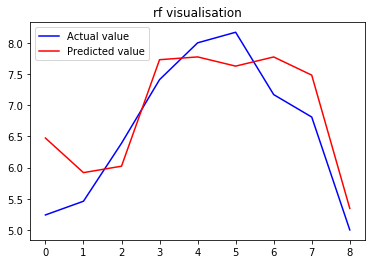

In [91]:
GetPred(Xtrain, Ytrain, Xtest, Ytest, ['rf', 2, 45])